# Análisis exploratorio.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("vehiculos.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,225.04,...,130,mpfi,8.81,6.81,9.0,111,5000,8.9271,11.4777,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,225.04,...,130,mpfi,8.81,6.81,9.0,111,5000,8.9271,11.4777,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,240.03,...,152,mpfi,6.81,8.81,9.0,154,5000,8.0769,11.0526,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,253.49,...,109,mpfi,8.10,8.64,10.0,102,5500,10.2024,12.7530,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,252.48,...,136,mpfi,8.10,8.64,8.0,115,5500,7.6518,9.3522,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,277.11,...,141,mpfi,9.60,8.00,9.5,114,5400,9.7773,11.9028,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,277.11,...,141,mpfi,9.60,8.00,8.7,160,5300,8.0769,10.6275,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,277.11,...,173,mpfi,9.09,7.29,8.8,134,5500,7.6518,9.7773,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,277.11,...,145,idi,7.65,8.64,23.0,106,4800,11.0526,11.4777,22470


## Entendiendo el problema.

Para el análisis exploratorio de datos, es necesario entender primero que se quiere hacer y la estructura general de los datos presentes.

En este caso, se buscara la relación de cada variable con respecto al precio, tratando de encontrar cuales variables son las que más afectan el precio de un vehículo.

Al terminar de manejar la data, es una buena idea crear un formato que indica que es la información que tiene cada columna.

 - "symboling": índice que refleja el riesgo de un carro, siendo -3 muy seguro y 3 muy riesgoso.

 - "Normalized-losses": perdida promedio por carro asegurado al año. El valor debe oscilar entre 65 y 265.

 - "make": la marca del vehículo.

 - "fuel-type": tipo de combustible.

 - "num-of-doors": número de puertas.

 - "body-style": tipo de cuerpo del vehículo.

 - "drive-wheels": tipo de tracción.

 - "engine-location": ubicación del motor.

 - "wheel-base": distancia entre ejes en centímetros.

 - "length", "width" y "height": largo, ancho y alto del vehículo e centímetros.

 - "curb-weight": peso estando vacío.

 - "engine-type": tipo de motor.

 - "num-of-cylinders": número de cilindros.

 - "engine-size": tamaño del motor.

 - "bore": diámetro del cilindro en centímetros.

 - "stroke": recorrido del cilindro en centímetros.

 - "compression-ratio": relación de compresión.

 - "horsepower": caballos de fuerza.

 - "peak-rpm": pico de revoluciones por minuto.

 - "city-kpl": promedio aproximado de kilometros recorrido por litro de combustible consumido dentro de la ciudad.

 - "highway-kpl": promedio aproximado de kilometros recorrido por litro de combustible consumido dentro en una autopista.

 - "price": precio del vehículo en dólares.

## Análisis univariable.

La variable "price" será la variable objetivo del análisis exploratorio.

En primero lugar comprobaremos si la distribucion del precio sigue una distribución normal. Para ello se hará el test Wilk-Shapiro:
 - H0: La distribución es normal.
 - H1: La distribución no es normal.
 
Si el p-valor es mayor a 0.05, fallamos al rechazar la hipótesis nula, es decir, la distribución es normal.

In [2]:
df["price"].describe()

count      205.000000
mean     13207.126829
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Count'>

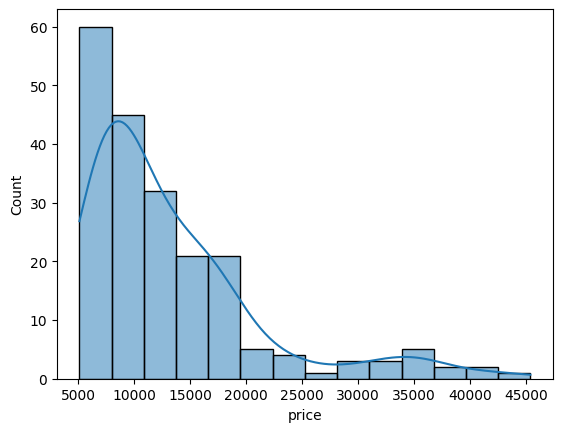

In [3]:
sns.histplot(df['price'], kde=True)

<AxesSubplot: xlabel='price', ylabel='Count'>

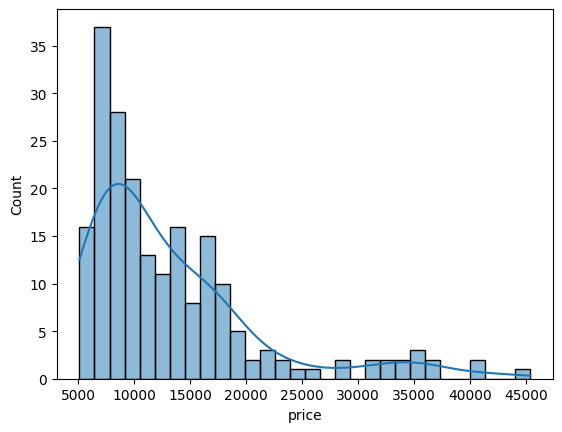

In [4]:
sns.histplot(df['price'], kde=True, bins=30)

A simple vista parece una distribución log-normal . De igual manera deben hacerse los tests para comprobar que tipo de distribucion es.

In [5]:
from scipy.stats import shapiro
stat, p = shapiro(df['price'])
print("El p-valor es: ", p)


El p-valor es:  1.6917933051111174e-15


In [6]:
import numpy as np
df['log_base10'] = np.log10(df['price'])

In [7]:
df['log_base10']

0      4.130173
1      4.217484
2      4.217484
3      4.144574
4      4.241795
         ...   
200    4.226471
201    4.279781
202    4.332135
203    4.351603
204    4.354589
Name: log_base10, Length: 205, dtype: float64

<AxesSubplot: xlabel='log_base10', ylabel='Count'>

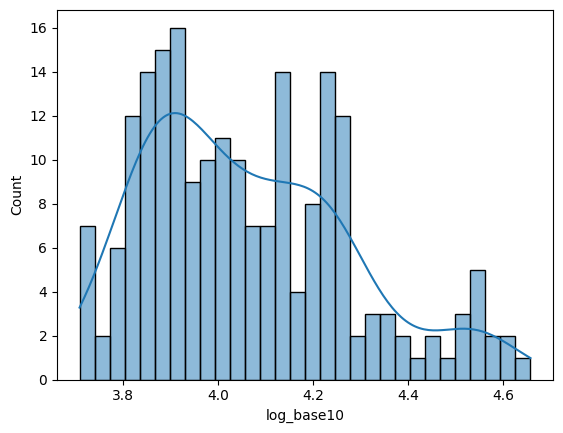

In [8]:
sns.histplot(df['log_base10'], kde=True, bins=30)

In [9]:
stat, p = shapiro(df['log_base10'])
print("El p-valor es: ", p)

El p-valor es:  2.2520753191201948e-06


In [10]:
df['raiz_price'] = df['price']**0.5

In [11]:
df['raiz_price']

0      116.167982
1      128.452326
2      128.452326
3      118.110118
4      132.098448
          ...    
200    129.788289
201    138.003623
202    146.577624
203    149.899967
204    150.416090
Name: raiz_price, Length: 205, dtype: float64

In [12]:
stat, p = shapiro(df['raiz_price'])
print("El p-valor es: ", p)

El p-valor es:  4.2185220594515016e-11


In [13]:
df['inverso_price'] = 1/df['price']

In [14]:
df['inverso_price']

0      0.000074
1      0.000061
2      0.000061
3      0.000072
4      0.000057
         ...   
200    0.000059
201    0.000053
202    0.000047
203    0.000045
204    0.000044
Name: inverso_price, Length: 205, dtype: float64

In [15]:
stat, p = shapiro(df['inverso_price'])
print("El p-valor es: ", p)

El p-valor es:  0.0009308370645157993


<AxesSubplot: xlabel='inverso_price', ylabel='Count'>

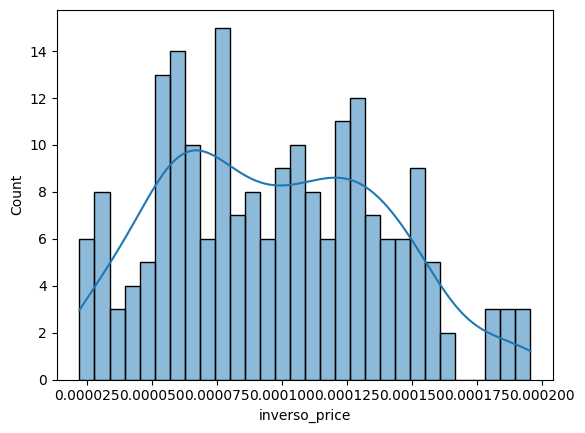

In [16]:
sns.histplot(df['inverso_price'], kde=True, bins=30)

Como podemos ver, aunque aproximamos un poco hacia una distribución normal, ninguna de las transformaciones Box-Cox nos funciono para rechazar la hipótesis nula, es decir, estadísticamente la distribución de los datos del precio no es una distribución normal.

In [17]:
df = df.drop(columns=['inverso_price', 'log_base10', 'raiz_price'])

### Correlacion entre variables

#### Variables numéricas

<AxesSubplot: xlabel='horsepower', ylabel='price'>

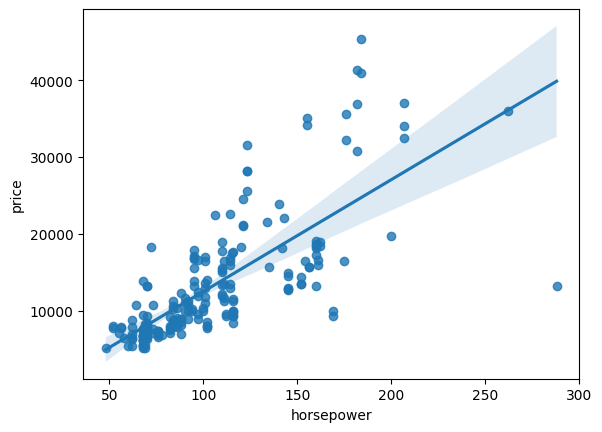

In [18]:
sns.regplot(x="horsepower", y="price", data=df)

Hay una correlación positiva entre los caballos de fuerza y el precio, es decir, cuando los vehículos tienen mayor fuerza, tienen tendencia de ser más costosos.

<AxesSubplot: xlabel='city-kpl', ylabel='price'>

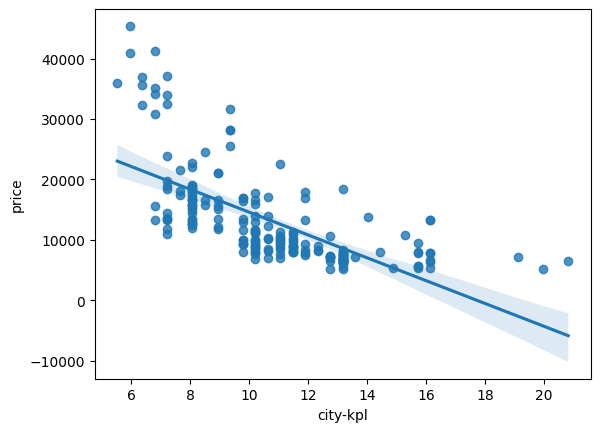

In [19]:
sns.regplot(x="city-kpl", y="price", data=df)

<AxesSubplot: xlabel='highway-kpl', ylabel='price'>

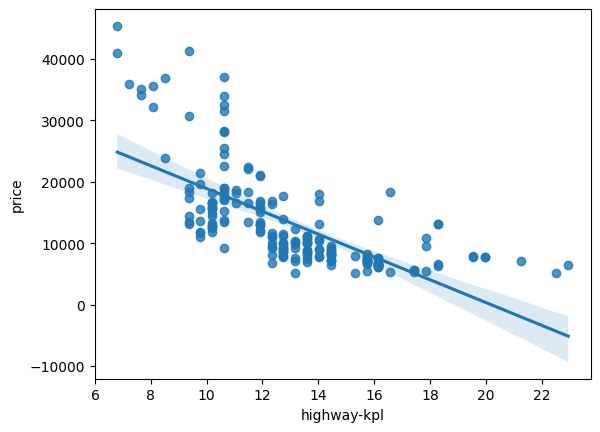

In [20]:
sns.regplot(x="highway-kpl", y="price", data=df)

La relacion del recorrido por litro consumido de combustible y el precio tiene correlación negativa, esto se explica con que los vehículo que tienen mas consumo son vehículos con mayor fuerza, tamaño, cantidad de asientos o lujos, lo cual los hacen más caros, mientras que los de menor consumo, además de que muchas veces son más sencillos, están enfocados en ser más rendidores en cuanto al recorrido por consumo del combustible.

<AxesSubplot: xlabel='engine-size', ylabel='price'>

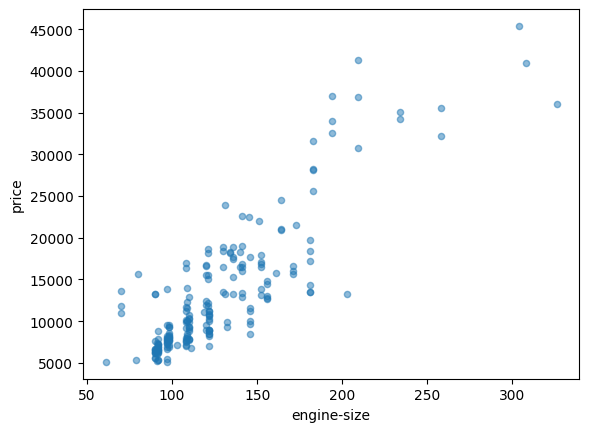

In [21]:
data = pd.concat([df['price'], df['engine-size']], axis=1)
data.plot.scatter(x='engine-size', y='price', alpha = 0.5)

Aplica la misma lógica que con los caballos de fuerza.

<AxesSubplot: xlabel='wheel-base', ylabel='price'>

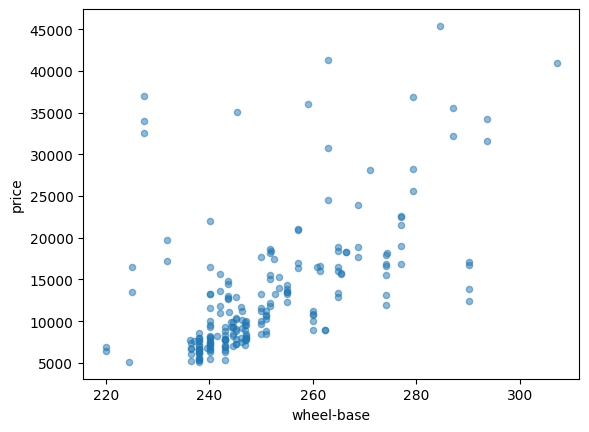

In [22]:
data = pd.concat([df['price'], df['wheel-base']], axis=1)
data.plot.scatter(x='wheel-base', y='price', alpha = 0.5)

Parece que existe una logirea correlación positiva. Para comprobarlo podemos usar seaborn regplot.

<AxesSubplot: xlabel='wheel-base', ylabel='price'>

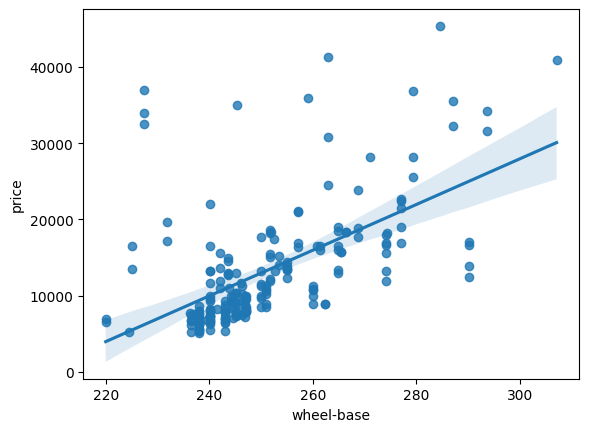

In [23]:
sns.regplot(x="wheel-base", y="price", data=df)

La diferencia es que nos muestra una linea recta de regresión lineal.

#### Variables categóricas.

El grafico de caja nos muestra los 4 percentiles, la mediana y valores atípicos:
 - Desde el bigote inferior hasta el inicio de la caja el cuartil 25%.
 - Desde el inicio de la caja hasta la linea que divide la caja el cuartil 50%.
 - Desde la linea que divide la caja hasta el final de la caja el cuartil 75%.
 - Desde el final de la caja hasta el bigote el ultimo cuartil.
 - La linea que divide la caja es la mediana.
 - Los puntos fuera de los bigotes son los valores atípicos.

<AxesSubplot: xlabel='body-style', ylabel='price'>

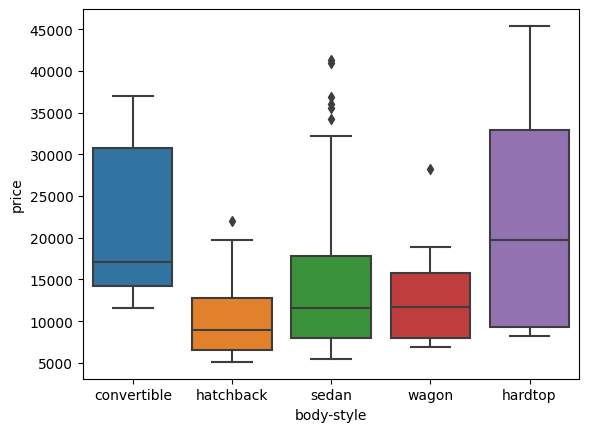

In [24]:
sns.boxplot(x="body-style", y="price", data=df)

In [25]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,225.04,...,130,mpfi,8.81,6.81,9.0,111,5000,8.9271,11.4777,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,225.04,...,130,mpfi,8.81,6.81,9.0,111,5000,8.9271,11.4777,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,240.03,...,152,mpfi,6.81,8.81,9.0,154,5000,8.0769,11.0526,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,253.49,...,109,mpfi,8.10,8.64,10.0,102,5500,10.2024,12.7530,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,252.48,...,136,mpfi,8.10,8.64,8.0,115,5500,7.6518,9.3522,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,277.11,...,141,mpfi,9.60,8.00,9.5,114,5400,9.7773,11.9028,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,277.11,...,141,mpfi,9.60,8.00,8.7,160,5300,8.0769,10.6275,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,277.11,...,173,mpfi,9.09,7.29,8.8,134,5500,7.6518,9.7773,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,277.11,...,145,idi,7.65,8.64,23.0,106,4800,11.0526,11.4777,22470


In [27]:
expensive = df.sort_values(by='price', ascending=False) #sorting the rows in ascending order
expensive.drop_duplicates(subset=['body-style'],keep='first')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
74,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,284.48,...,304,mpfi,9.65,8.51,8.0,184,4500,5.9514,6.8016,45400
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,262.89,...,209,mpfi,9.19,8.61,8.0,182,5400,6.8016,9.3522,41315
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,227.33,...,194,mpfi,9.50,7.37,9.5,207,5900,7.2267,10.6275,37028
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,279.40,...,183,idi,9.09,9.25,21.5,123,4350,9.3522,10.6275,28248
125,3,186.0,porsche,gas,std,two,hatchback,rwd,front,240.03,...,151,mpfi,10.01,7.90,9.5,143,5500,8.0769,11.4777,22018


Podemos observar que los valores mas altos pertenecen al body style hardtop, que el precio mínimo más alto dentro de una clase es en el caso de los convertibles y que los más económicos son los hatchback.

(-0.5, 5.5, 0.0, 60000.0)

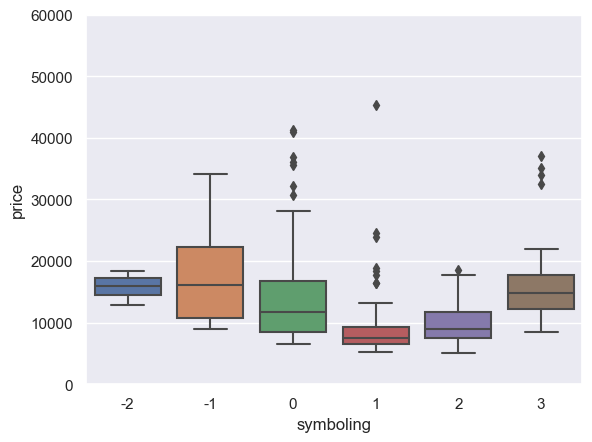

In [114]:
sns.boxplot(x="symboling", y="price", data=df).axis(ymin=0, ymax=60000)

<AxesSubplot: xlabel='fuel-type', ylabel='price'>

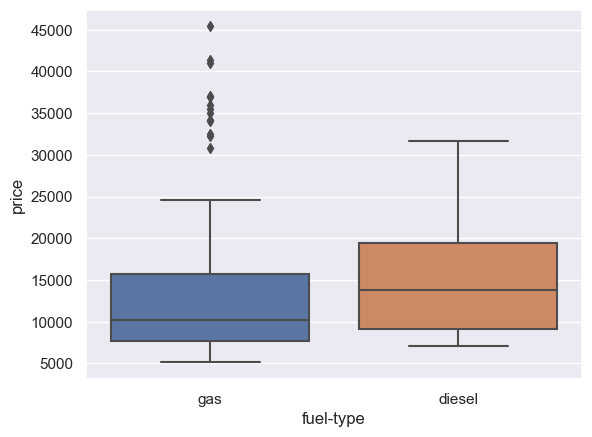

In [115]:
sns.boxplot(x="fuel-type", y="price", data=df)

Aunque los diesel sean probablemente más caros, los valores mas altos pertenecen a gas.

<AxesSubplot: xlabel='num-of-doors', ylabel='price'>

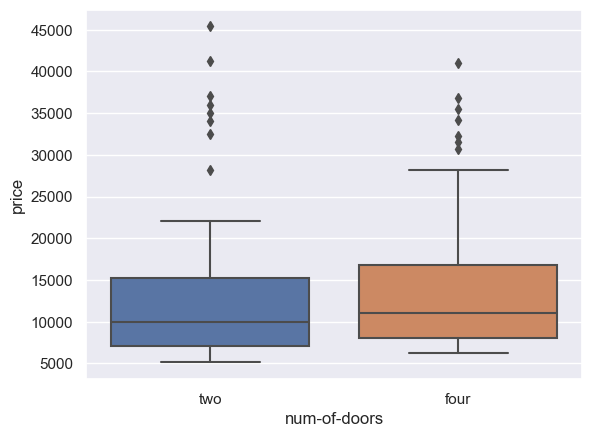

In [116]:
sns.boxplot(x="num-of-doors", y="price", data=df)

Los vehículos con 2 puertas suelen ser mas económicos, pero la mayoría de deportivos son de dos puertas, por eso vemos que el valor más alto es atípico y es de dos puertas.

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

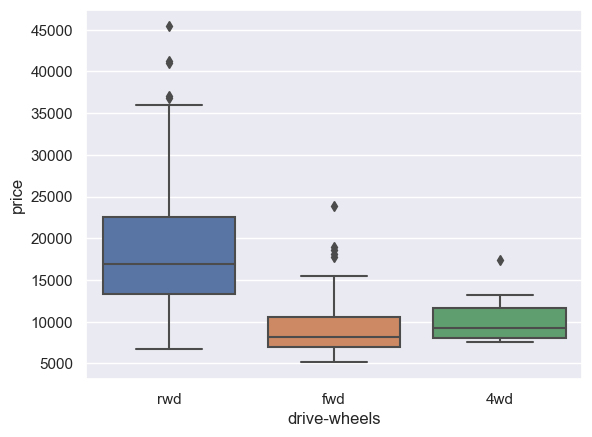

In [117]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Los vehículos de tracción trasera son los mas costosos y también los valores atípicos más altos.

<AxesSubplot: xlabel='num-of-cylinders', ylabel='price'>

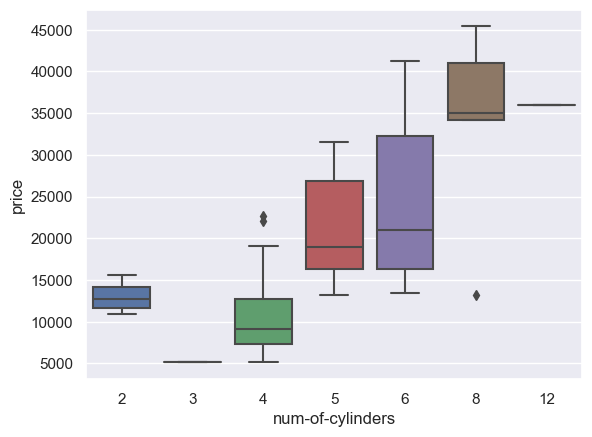

In [118]:
sns.boxplot(x="num-of-cylinders", y="price", data=df)

In [119]:
df[['num-of-cylinders','price']].groupby(['num-of-cylinders']).mean()

,price
num-of-cylinders,
2,13020.000000
3,5151.000000
4,10339.723270
5,21207.545455
6,23671.833333
8,33761.400000
12,36000.000000


El número de cilindros vemos que tiene correlación positiva.

<AxesSubplot: xlabel='engine-location', ylabel='price'>

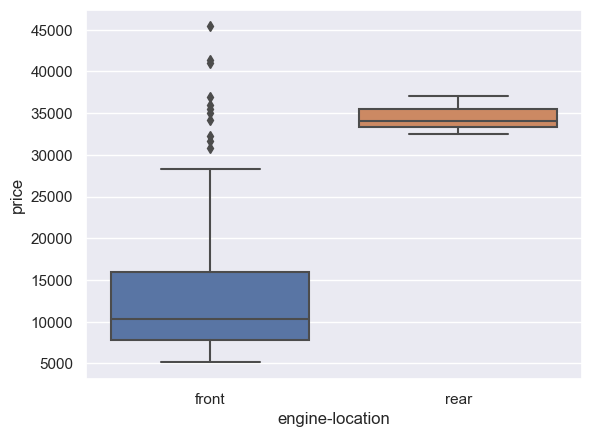

In [120]:
sns.boxplot(x="engine-location", y="price", data=df)

In [121]:
df[['engine-location','price']].groupby(['engine-location']).mean()

,price
engine-location,
front,12890.480198
rear,34528.000000


Agrupar los valores por categoria y obtener el promedio puede ayudar a conocer el valor exacto del promedio y puede sumar al análisis.

Y en la localización del motor podemos ver que si el vehiculo usa motor en la parte trasera el costo es bastante superior en promedio, ya que casi todos son deportivos o de lujo, aunque los valores más altos usan el motor en la parte delantera.

Algunas veces, ver el valor máximo nos ayuda a entender valores atípicos.

In [122]:
df[df['price'] == df['price'].max()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
74,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,284.48,...,304,mpfi,9.65,8.51,8.0,184,4500,5.9514,6.8016,45400


## Estadística descriptiva.

In [123]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,250.842049,0.836379,0.911600,0.898417,1158.949220,4.380488,126.907317,8.456927,8.270195,10.142537,104.887805,5125.121951,10.720815,13.072343,13207.126829
std,1.245307,35.442168,15.295501,0.059286,0.029676,0.040865,236.128204,1.080854,41.642693,0.687305,0.796052,3.972040,40.030774,476.985643,2.781064,2.927427,7868.768212
min,-2.000000,65.000000,219.960000,0.678037,0.834023,0.799328,674.810000,2.000000,61.000000,6.450000,5.260000,7.000000,48.000000,4150.000000,5.526300,6.801600,5118.000000
25%,0.000000,94.000000,240.030000,0.799137,0.886572,0.869577,972.760000,4.000000,97.000000,8.000000,7.900000,8.600000,70.000000,4800.000000,8.076900,10.627500,7788.000000
50%,1.000000,115.000000,246.380000,0.832302,0.905957,0.904668,1094.750000,4.000000,120.000000,8.410000,8.360000,9.000000,95.000000,5200.000000,10.202400,12.753000,10595.000000
75%,2.000000,150.000000,260.100000,0.879865,0.925343,0.928106,1331.020000,4.000000,141.000000,9.090000,8.660000,9.400000,120.000000,5500.000000,12.753000,14.453400,16500.000000
max,3.000000,256.000000,307.090000,1.000000,1.000000,1.000000,1843.930000,12.000000,326.000000,10.010000,10.590000,23.000000,288.000000,6600.000000,20.829900,22.955400,45400.000000


Nos permite ver las estadísticas descriptivas de las variables numéricas.

In [124]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system
count,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,mpfi
freq,32,185,168,116,96,120,202,148,94


In [125]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [126]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [127]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

## Análisis multivariable.

C:\Users\adria\AppData\Local\Temp\ipykernel_9456\434946285.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

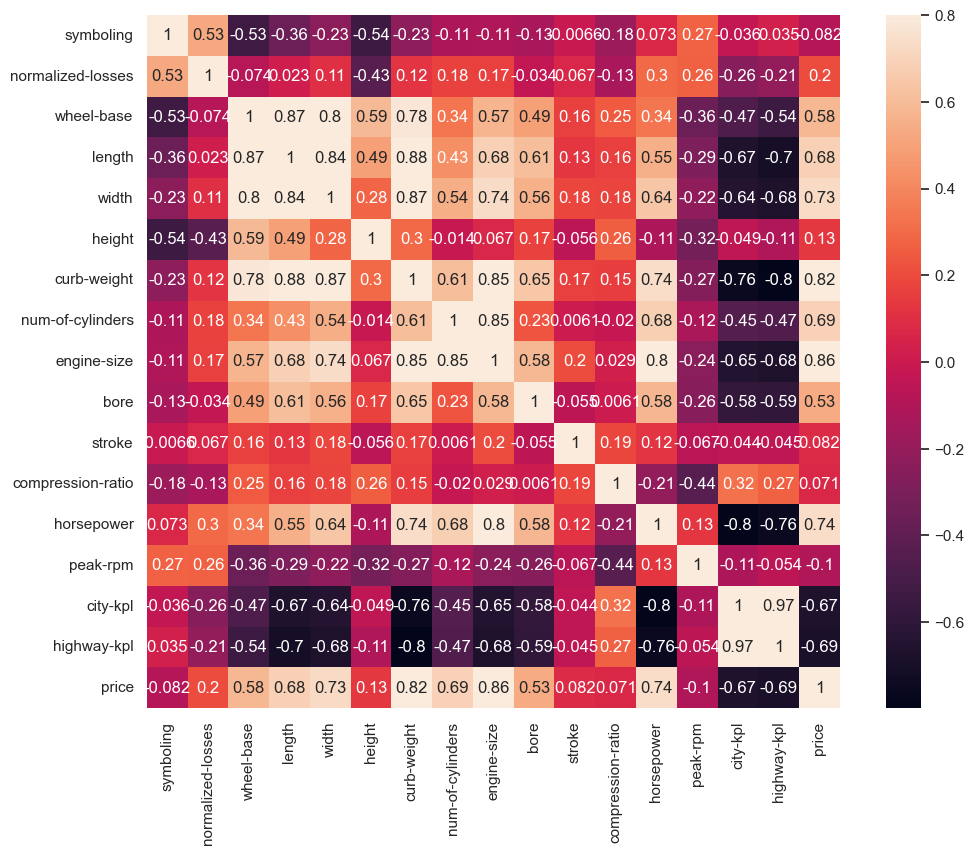

In [134]:
correlation = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation, vmax=.8, square=True, annot=True)

El análisis grafico del mapa de calor de la matriz de correlación, nor permite ver cuales son las variables que presentan mayor correlación positiva y negativa.

Podemos ver que las variables "wheel-base", "width", length, weight, num-of-cylinders, engine-size y horserpower son las variables que mayor correlación positiva tienen, mientras que cityi-kpl y highway-kpl son quienes tienen mayor correlación negativa.

In [129]:
nvar = 10
cols = (correlation**2).nlargest(nvar, 'price')['price']
cols

price               1.000000
engine-size         0.742617
curb-weight         0.673753
horsepower          0.549010
width               0.530898
highway-kpl         0.476826
num-of-cylinders    0.473027
length              0.466474
city-kpl            0.445489
wheel-base          0.340059
Name: price, dtype: float64

<AxesSubplot: >

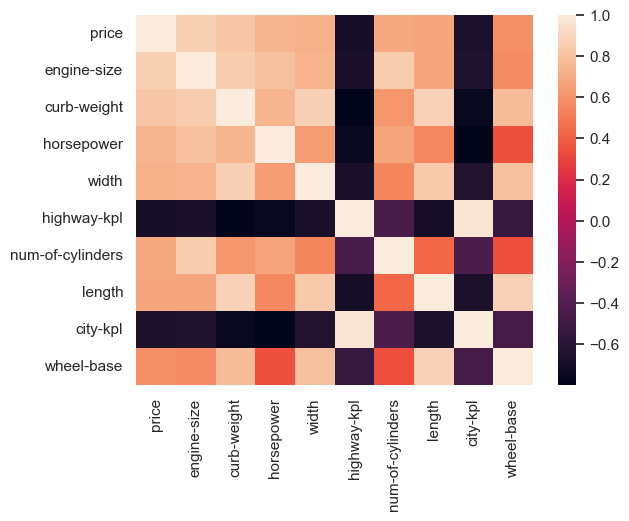

In [130]:
tcm = np.corrcoef(df[cols.index].values.T)
sns.heatmap(tcm, yticklabels = cols.index, xticklabels = cols.index)

<AxesSubplot: >

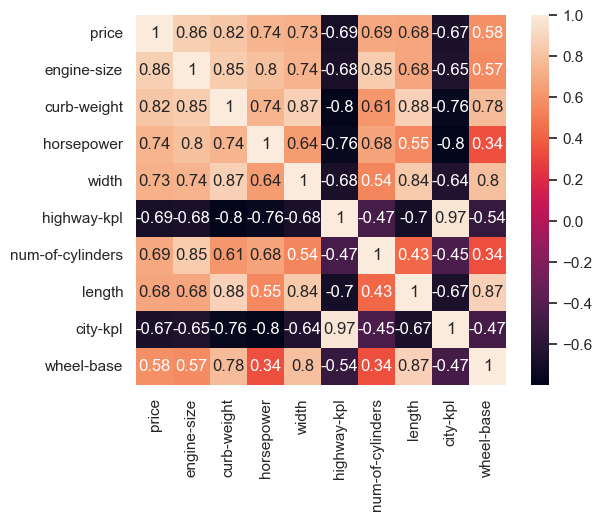

In [131]:
sns.heatmap(tcm, square=True, annot=True, yticklabels = cols.index, xticklabels = cols.index)

In [132]:
correlation[['price']].sort_values(by='price', ascending=False).style.background_gradient()

,price
price,1.000000
engine-size,0.861752
curb-weight,0.820825
horsepower,0.740952
width,0.728627
num-of-cylinders,0.687769
length,0.682989
wheel-base,0.583146
bore,0.532646
normalized-losses,0.203254


C:\Users\adria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


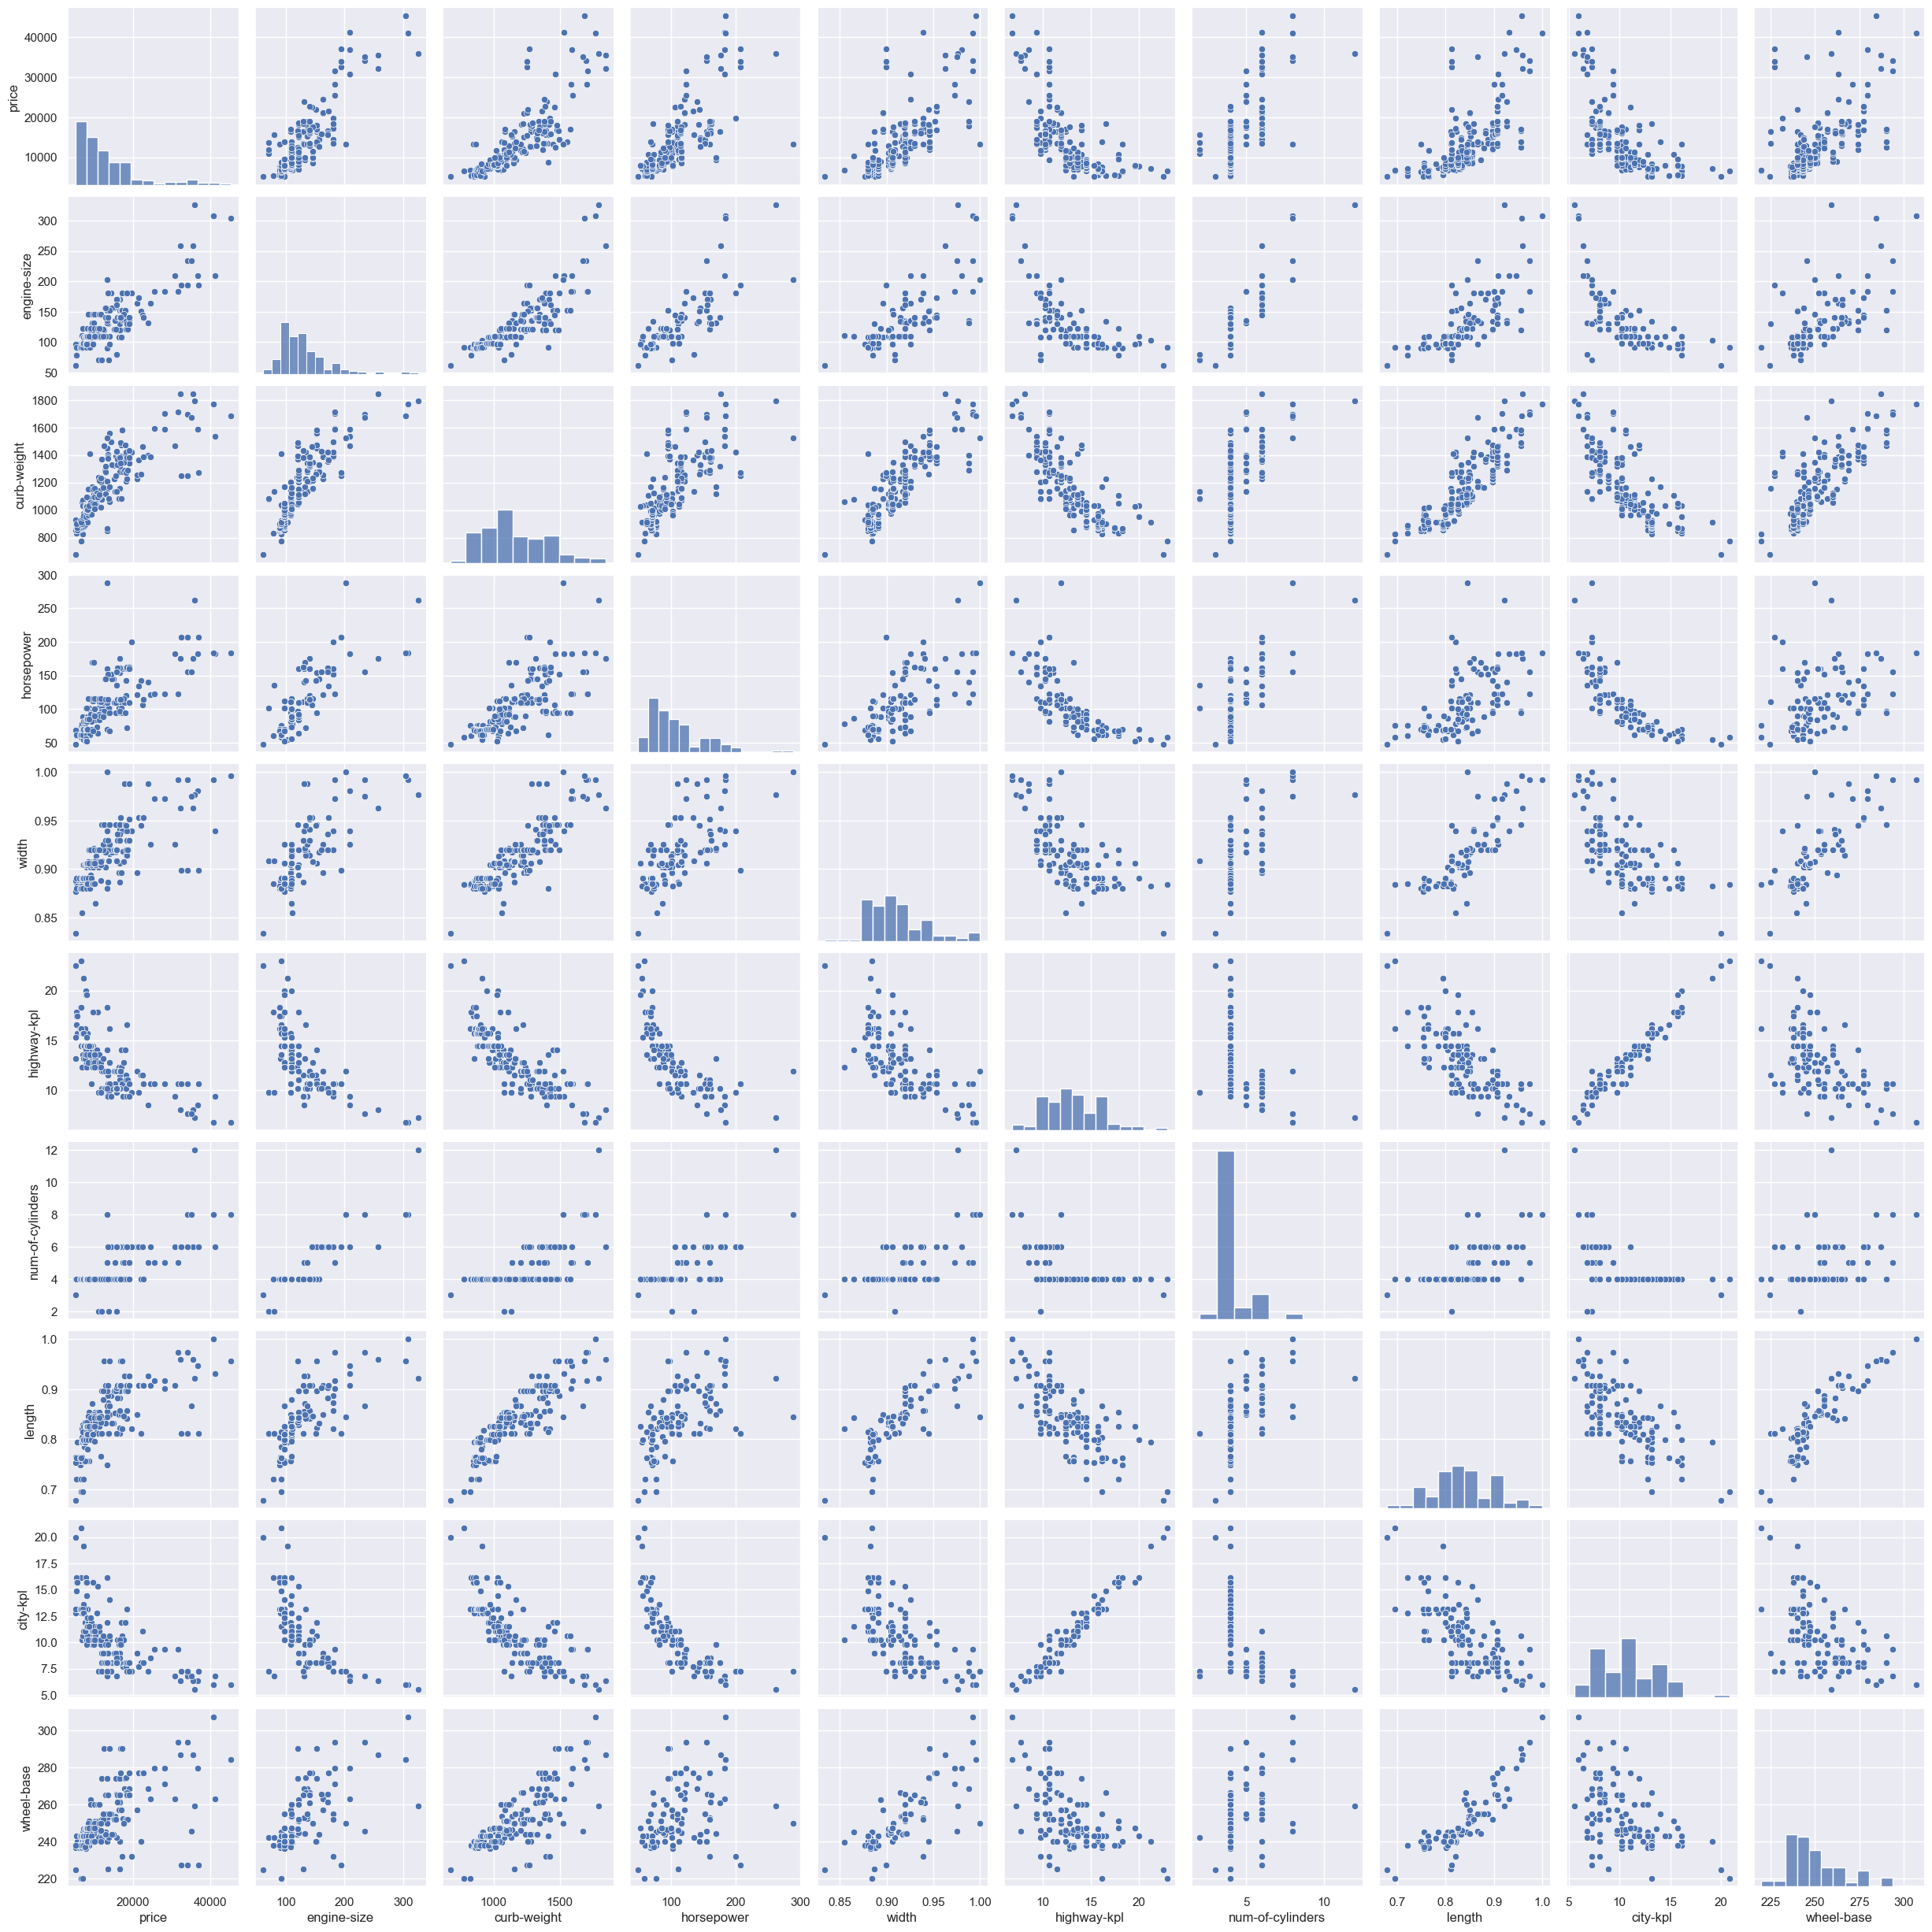

In [133]:
sns.set()
sns.pairplot(df[cols.index], size = 2.5)
plt.show()

Un diagrama de dispersión de todas las variables nos permite ver la distribución poblacional de cada variable y la relacion entre cada variable.

En este caso la distribucion del precio no es normal, por lo que no cumple el supuesto para hacer un analisis de la varianza (ANOVA) y tampoco podemos hacer un test de pearson para determinar si la correlación entre las variables es estadísticamente significativa.

Solo podemos concluir que las variables que tienen mayor correlación (sin saber su significancia estadística) con el precio son:
 - El tamaño del motor.
 - El peso.
 - Los caballos de fuerza.
 - El ancho.
 - El recorrido por litro de combustible.
 - El número de cilindros.
 - El largo del vehículo.
 - El recorrido por litro.
 - La distancia entre ejes.

In [142]:
correlation['price'][cols.index]

price               1.000000
engine-size         0.861752
curb-weight         0.820825
horsepower          0.740952
width               0.728627
highway-kpl        -0.690526
num-of-cylinders    0.687769
length              0.682989
city-kpl           -0.667449
wheel-base          0.583146
Name: price, dtype: float64

## Visualizaciones

<AxesSubplot: xlabel='count', ylabel='make'>

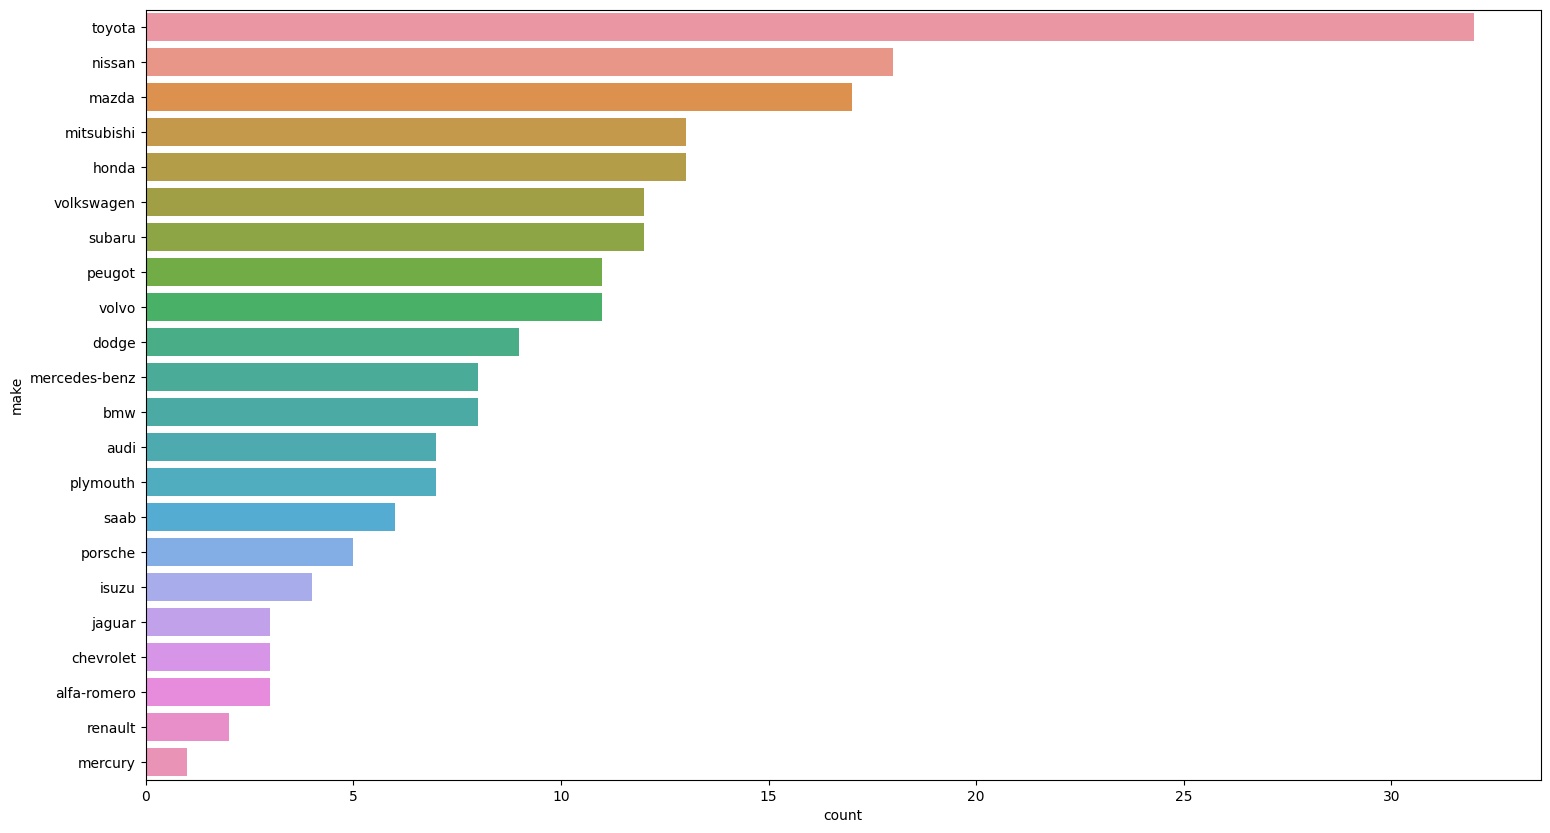

In [67]:
f, ax = plt.subplots(1,1, figsize = (18,10))
sns.countplot(y = df['make'], data = df, order = df['make'].value_counts().index)

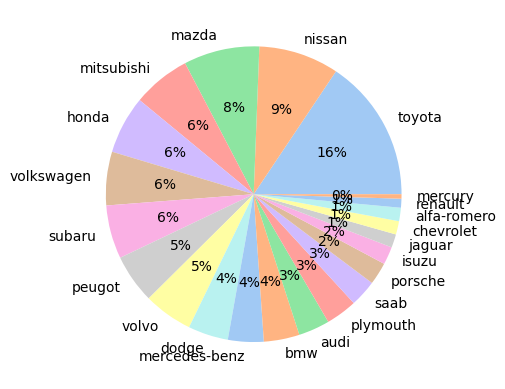

In [53]:
make_counts = df[['make']].value_counts().items()
pie_label = []
pie_values = []
for k, v in make_counts:
    pie_label.append(k[0])
    pie_values.append(v)

colors = sns.color_palette('pastel')[0:22]

plt.pie(pie_values, labels = pie_label, colors = colors, autopct='%.0f%%')
plt.show()

In [58]:
top_10 = df.sort_values(by=['price'], ascending=False).head(10)
top_10

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
74,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,284.48,...,304,mpfi,9.65,8.51,8.0,184,4500,5.9514,6.8016,45400
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,262.89,...,209,mpfi,9.19,8.61,8.0,182,5400,6.8016,9.3522,41315
73,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,307.09,...,308,mpfi,9.65,8.51,8.0,184,4500,5.9514,6.8016,40960
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,227.33,...,194,mpfi,9.50,7.37,9.5,207,5900,7.2267,10.6275,37028
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,279.40,...,209,mpfi,9.19,8.61,8.0,182,5400,6.3765,8.5020,36880
49,0,NaN,jaguar,gas,std,two,sedan,rwd,front,259.08,...,326,mpfi,8.99,7.01,11.5,262,5000,5.5263,7.2267,36000
48,0,NaN,jaguar,gas,std,four,sedan,rwd,front,287.02,...,258,mpfi,9.22,10.59,8.1,176,4750,6.3765,8.0769,35550
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,245.36,...,234,mpfi,8.79,7.87,8.3,155,4750,6.8016,7.6518,35056
71,-1,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,293.62,...,234,mpfi,8.79,7.87,8.3,155,4750,6.8016,7.6518,34184
127,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,227.33,...,194,mpfi,9.50,7.37,9.5,207,5900,7.2267,10.6275,34028


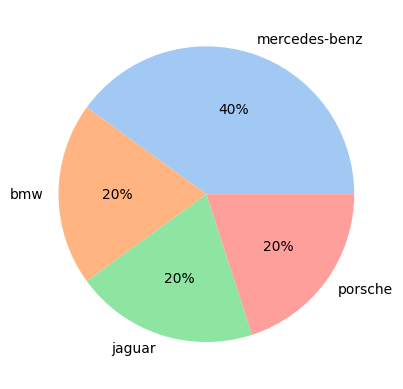

In [59]:
make_counts = top_10[['make']].value_counts().items()
pie_label = []
pie_values = []
for k, v in make_counts:
    pie_label.append(k[0])
    pie_values.append(v)

colors = sns.color_palette('pastel')[0:22]

plt.pie(pie_values, labels = pie_label, colors = colors, autopct='%.0f%%')
plt.show()

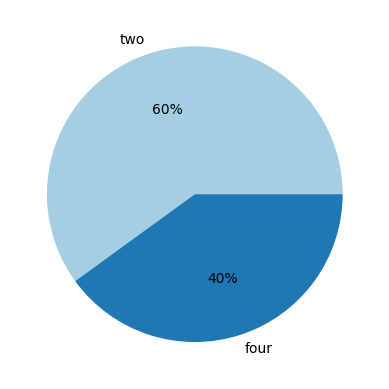

In [62]:
make_counts = top_10[['num-of-doors']].value_counts().items()
pie_label = []
pie_values = []
for k, v in make_counts:
    pie_label.append(k[0])
    pie_values.append(v)

colors = sns.color_palette('Paired')[0:2]

plt.pie(pie_values, labels = pie_label, colors = colors, autopct='%.0f%%')
plt.show()

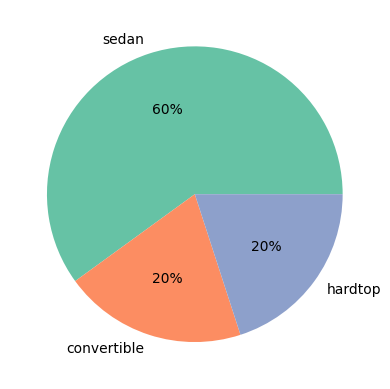

In [63]:
make_counts = top_10[['body-style']].value_counts().items()
pie_label = []
pie_values = []
for k, v in make_counts:
    pie_label.append(k[0])
    pie_values.append(v)

colors = sns.color_palette('Set2')[0:3]

plt.pie(pie_values, labels = pie_label, colors = colors, autopct='%.0f%%')
plt.show()

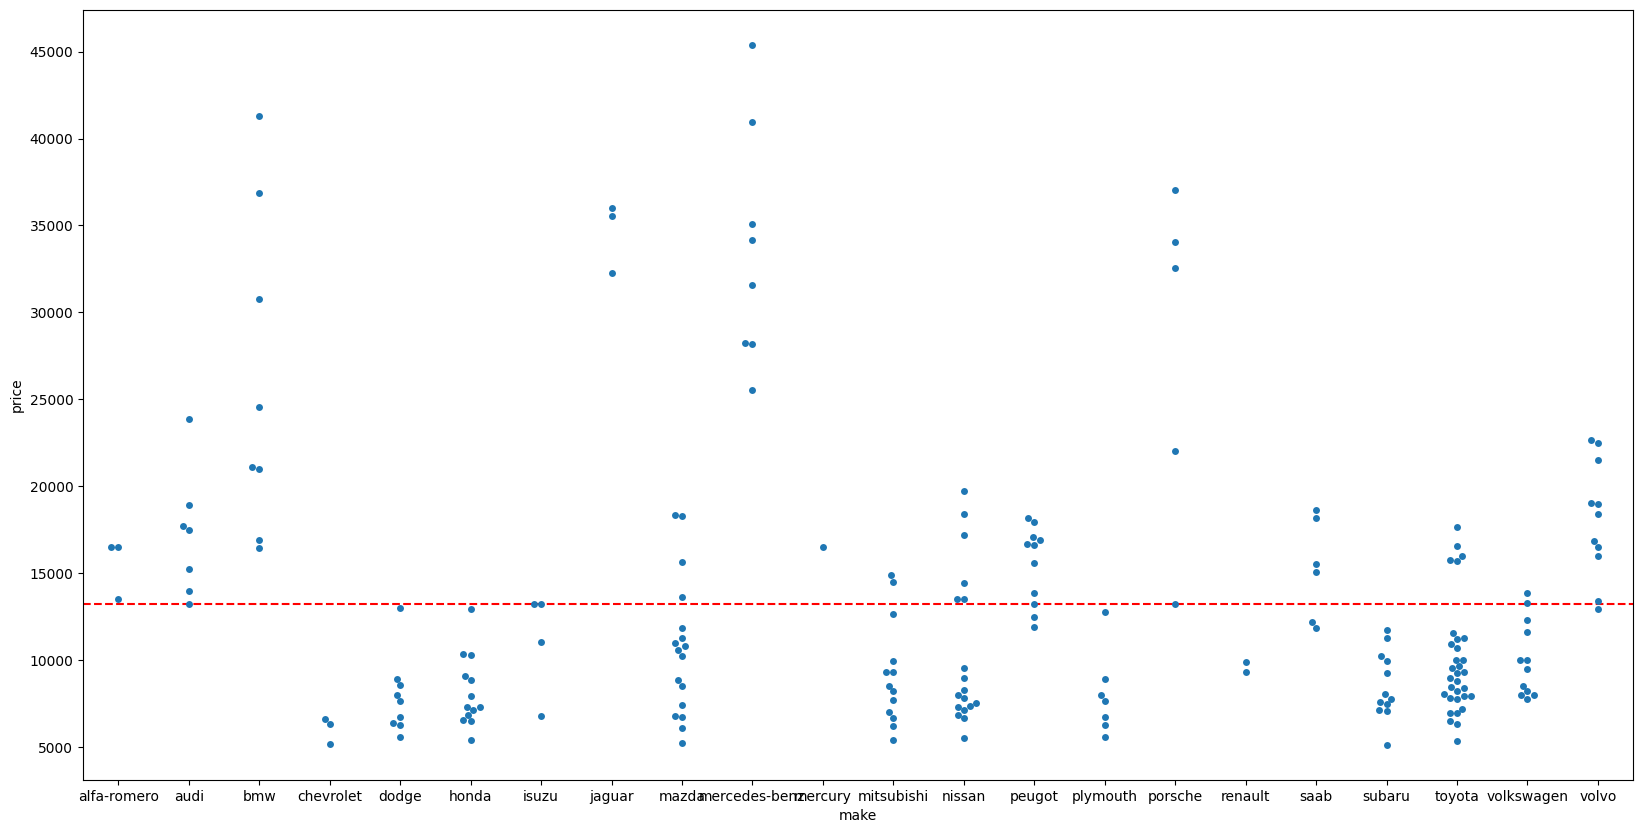

In [66]:
f, ax = plt.subplots(1,1, figsize = (20,10))
ax = sns.swarmplot(data = df, x = 'make', y= 'price')

plt.axhline(df['price'].mean(), color = 'red', linestyle = 'dashed') #giving a straight line on mean

plt.show()